In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [4]:
df_job = pd.read_csv('data_science_job.csv')
df_job

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14.0,NaN,NaN,42.0,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14.0,NaN,NaN,52.0,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,50-99,Pvt Ltd,44.0,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,0.0,500-999,Pvt Ltd,97.0,0.0


In [14]:
missing_val_pct = df_job.isnull().mean()*100
to_be_imputed = missing_val_pct[(missing_val_pct<5)&(missing_val_pct>0)]
to_be_imputed

city_development_index    2.500261
enrolled_university       2.014824
education_level           2.401086
experience                0.339284
training_hours            3.998330
dtype: float64

In [16]:
df_job[to_be_imputed.index].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
15511,0.920,no_enrollment,Graduate,20.0,154.0
9115,0.920,no_enrollment,Masters,20.0,20.0
3655,0.939,Full time course,Graduate,9.0,NaN
7372,0.920,no_enrollment,Masters,20.0,46.0
7170,0.624,Full time course,High School,3.0,95.0


In [30]:
len(df_job[to_be_imputed.index].dropna())

17182

In [20]:
len(df_job[to_be_imputed.index].dropna())/len(df_job)

0.8968577095730244

array([[<AxesSubplot:title={'center':'city_development_index'}>,
        <AxesSubplot:title={'center':'experience'}>],
       [<AxesSubplot:title={'center':'training_hours'}>, <AxesSubplot:>]],
      dtype=object)

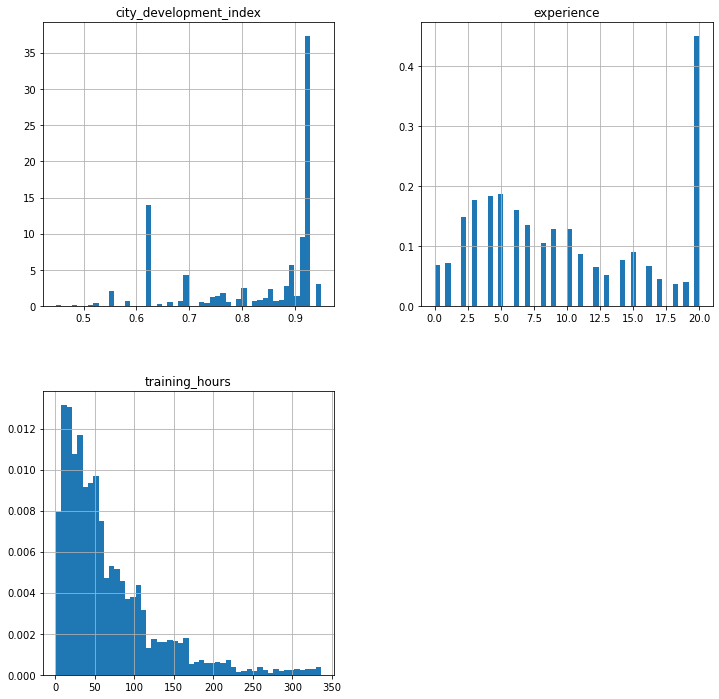

In [26]:
df_job[to_be_imputed.index].hist(bins =50,density = True,figsize=(12,12))

In [31]:
to_be_imputed.index

Index(['city_development_index', 'enrolled_university', 'education_level',
       'experience', 'training_hours'],
      dtype='object')

In [28]:
df_dropped=df_job[to_be_imputed.index].dropna()

In [29]:
df_dropped

,city_development_index,enrolled_university,education_level,experience,training_hours
0,0.920,no_enrollment,Graduate,20.0,36.0
1,0.776,no_enrollment,Graduate,15.0,47.0
2,0.624,Full time course,Graduate,5.0,83.0
4,0.767,no_enrollment,Masters,20.0,8.0
5,0.764,Part time course,Graduate,11.0,24.0
...,...,...,...,...,...
19153,0.878,no_enrollment,Graduate,14.0,42.0
19154,0.920,no_enrollment,Graduate,14.0,52.0
19155,0.920,no_enrollment,Graduate,20.0,44.0
19156,0.802,no_enrollment,High School,0.0,97.0


<AxesSubplot:title={'center':'city_development_index'}, ylabel='Frequency'>

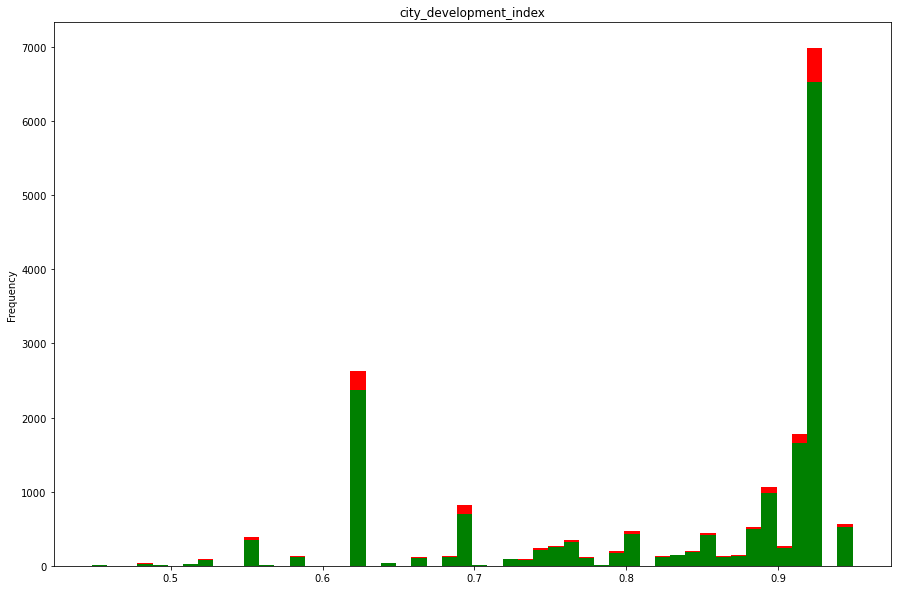

In [58]:
## Before and after the drop the Distribution of column should remain the same'
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.set_title('city_development_index')
df_job['city_development_index'].plot(kind = 'hist',ax= ax,bins =50,color = 'red')

df_dropped['city_development_index'].plot(kind = 'hist',ax= ax,bins =50,color = 'green')


In [37]:
df_dropped['city_development_index'].describe()

count    17182.000000
mean         0.831076
std          0.122308
min          0.448000
25%          0.743000
50%          0.910000
75%          0.920000
max          0.949000
Name: city_development_index, dtype: float64

In [38]:
df_job['city_development_index'].describe()

count    18679.000000
mean         0.828951
std          0.123334
min          0.448000
25%          0.740000
50%          0.903000
75%          0.920000
max          0.949000
Name: city_development_index, dtype: float64

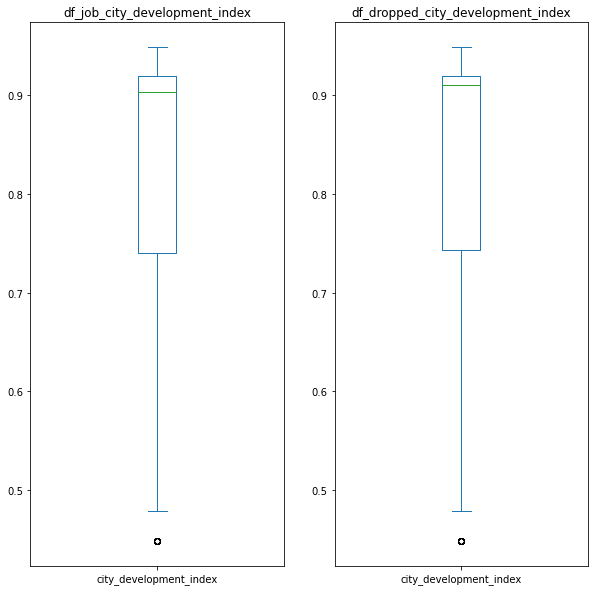

In [54]:
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(121)
df_job['city_development_index'].plot(kind ='box',ax=ax1)
ax1.set_title("df_job_city_development_index")

ax2 = fig.add_subplot(122)
df_dropped['city_development_index'].plot(kind ='box',ax=ax2)
ax2.set_title("df_dropped_city_development_index")
plt.show()

In [61]:
df_dropped.corr()

,city_development_index,experience,training_hours
city_development_index,1.000000,0.331304,0.000958
experience,0.331304,1.000000,-0.000823
training_hours,0.000958,-0.000823,1.000000


In [63]:
df_job.corr()

,enrollee_id,city_development_index,experience,training_hours,target
enrollee_id,1.000000,-0.039557,-0.036147,0.002263,0.049475
city_development_index,-0.039557,1.000000,0.333050,-0.002083,-0.340239
experience,-0.036147,0.333050,1.000000,-0.000815,-0.178238
training_hours,0.002263,-0.002083,-0.000815,1.000000,-0.021706
target,0.049475,-0.340239,-0.178238,-0.021706,1.000000


## AS IT CAN BE SEEN POST AND PRE DROP THE CORRELATION MATRIX ALMOST REMAINS SAME OR ATLEAST NONE DESRUPTIVE.

In [76]:
bfre= ((df_job['enrolled_university'].value_counts())/len(df_job))*100
aftr = ((df_dropped['enrolled_university'].value_counts())/len(df_dropped))*100
tmp = pd.concat([bfre,aftr],axis =1)
tmp.columns = ['before','after']
tmp


,before,after
no_enrollment,72.121307,73.518799
Full time course,19.610607,20.073333
Part time course,6.253262,6.407869


In [71]:
((df_dropped['enrolled_university'].value_counts())/len(df_job))*100


no_enrollment       65.935901
Full time course    18.002923
Part time course     5.746946
Name: enrolled_university, dtype: float64

## Before and AFTER THE DROP THE CATEGORIES HAS THE SAME RATIO, IT CLEARLY INDICATES THAT THE drop IS MCAR (Missing completely at Random)

## Mean and Median Imputation

In [83]:
df_impute=pd.read_csv('titanic_toy.csv')

In [85]:
df_impute.sample(5)

,Age,Fare,Family,Survived
881,33.0,7.8958,0,0
124,54.0,77.2875,1,0
701,35.0,26.2875,0,1
1,38.0,71.2833,1,1
555,62.0,26.5500,0,0


In [92]:
to_be_imputed=df_impute.isnull().mean()[df_impute.isnull().mean()*100>5]*100
to_be_imputed

Age     19.865320
Fare     5.050505
dtype: float64

In [98]:
x= df_impute.drop('Survived',axis =1)
y = df_impute['Survived']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)


<AxesSubplot:ylabel='Density'>

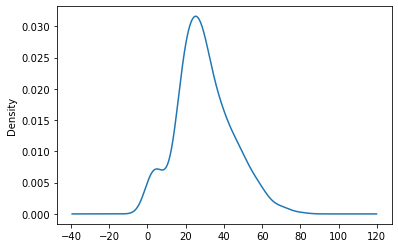

In [103]:
xtrain['Age'].plot(kind = 'kde')

<AxesSubplot:ylabel='Density'>

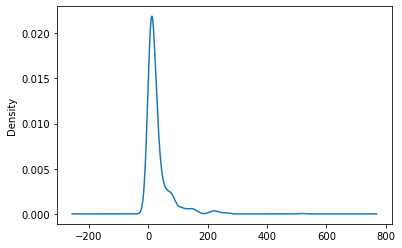

In [108]:
xtrain['Fare'].plot(kind ='kde')

## IMPUTATION By using the pandas function

In [112]:
xtrain['Fare'].median()

13.7917

In [115]:
xtrain['Fare_mean'] = xtrain['Fare'].fillna(xtrain['Fare'].mean())
xtrain['Fare_median'] = xtrain['Fare'].fillna(xtrain['Fare'].mean())

xtrain['Age_mean'] = xtrain['Age'].fillna(xtrain['Age'].mean())
xtrain['Age_median'] = xtrain['Age'].fillna(xtrain['Age'].mean())

C:\Users\kamle\AppData\Local\Temp/ipykernel_13952/2474621181.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xtrain['Fare_mean'] = xtrain['Fare'].fillna(xtrain['Fare'].mean())
C:\Users\kamle\AppData\Local\Temp/ipykernel_13952/2474621181.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xtrain['Fare_median'] = xtrain['Fare'].fillna(xtrain['Fare'].mean())
C:\Users\kamle\AppData\Local\Temp/ipykernel_13952/2474621181.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [116]:
xtrain

,Age,Fare,Family,Fare_mean,Fare_median,Age_mean,Age_median
874,28.0,24.0000,1,24.0000,24.0000,28.000000,28.000000
393,23.0,113.2750,1,113.2750,113.2750,23.000000,23.000000
293,24.0,8.8500,0,8.8500,8.8500,24.000000,24.000000
291,19.0,91.0792,1,91.0792,91.0792,19.000000,19.000000
260,NaN,7.7500,0,7.7500,7.7500,29.708785,29.708785
...,...,...,...,...,...,...,...
840,20.0,7.9250,0,7.9250,7.9250,20.000000,20.000000
202,34.0,6.4958,0,6.4958,6.4958,34.000000,34.000000
606,30.0,7.8958,0,7.8958,7.8958,30.000000,30.000000
337,41.0,134.5000,0,134.5000,134.5000,41.000000,41.000000


In [122]:
xtest['Age_median'] = xtest['Age'].fillna(xtrain['Age'].median())
xtest['Age_mean'] = xtest['Age'].fillna(xtrain['Age'].mean())
xtest['Fare_median'] = xtest['Fare'].fillna(xtrain['Fare'].median())
xtest['Fare_mean'] = xtest['Fare'].fillna(xtrain['Fare'].mean())


C:\Users\kamle\AppData\Local\Temp/ipykernel_13952/3076969265.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xtest['Age_median'] = xtest['Age'].fillna(xtrain['Age'].median())
C:\Users\kamle\AppData\Local\Temp/ipykernel_13952/3076969265.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xtest['Age_mean'] = xtest['Age'].fillna(xtrain['Age'].mean())
C:\Users\kamle\AppData\Local\Temp/ipykernel_13952/3076969265.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

In [123]:
xtest

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
547,NaN,13.8625,0,28.00,29.708785,13.8625,13.862500
725,20.00,8.6625,0,20.00,20.000000,8.6625,8.662500
817,31.00,37.0042,2,31.00,31.000000,37.0042,37.004200
158,NaN,8.6625,0,28.00,29.708785,8.6625,8.662500
848,28.00,33.0000,1,28.00,28.000000,33.0000,33.000000
...,...,...,...,...,...,...,...
398,23.00,10.5000,0,23.00,23.000000,10.5000,10.500000
692,NaN,56.4958,0,28.00,29.708785,56.4958,56.495800
469,0.75,NaN,3,0.75,0.750000,13.7917,30.489616
63,4.00,27.9000,5,4.00,4.000000,27.9000,27.900000


<AxesSubplot:>

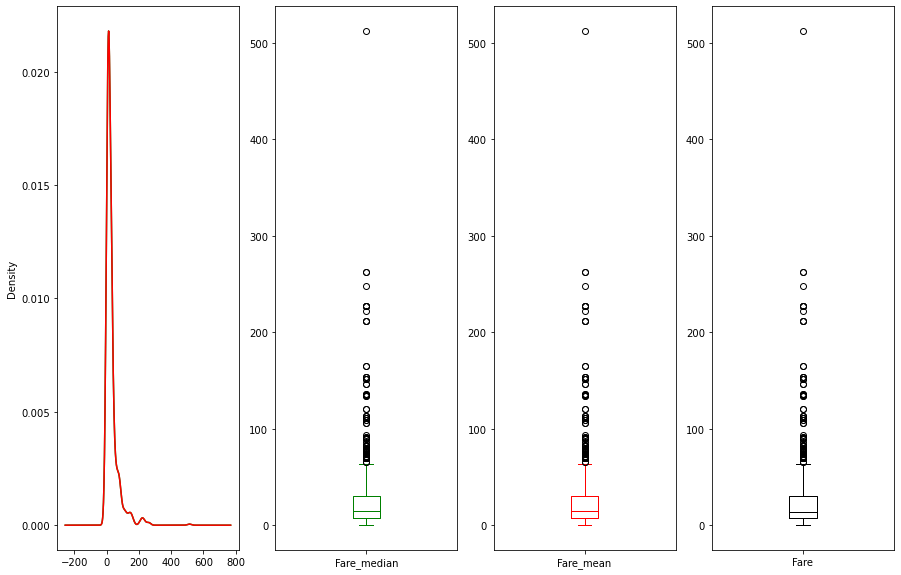

In [137]:
fig = plt.figure(figsize=(15,10))
ax1  = fig.add_subplot(141)

xtrain['Fare_median'].plot(kind ='kde',color = 'green',ax= ax1)
xtrain['Fare_mean'].plot(kind ='kde',color = 'red',ax= ax1)

ax.set_title('fare')
ax2  = fig.add_subplot(142)

xtrain['Fare_median'].plot(kind ='box',color = 'green',ax= ax2)

ax3  = fig.add_subplot(143)

xtrain['Fare_mean'].plot(kind ='box',color = 'red',ax= ax3)

ax4  = fig.add_subplot(144)

xtrain['Fare'].plot(kind ='box',color = 'black',ax= ax4)


In [133]:
xtrain['Fare_median'].describe()

count    712.000000
mean      30.489616
std       42.528629
min        0.000000
25%        7.917700
50%       15.075000
75%       30.489616
max      512.329200
Name: Fare_median, dtype: float64

In [134]:
xtrain['Fare_mean'].describe()

count    712.000000
mean      30.489616
std       42.528629
min        0.000000
25%        7.917700
50%       15.075000
75%       30.489616
max      512.329200
Name: Fare_mean, dtype: float64

In [136]:
xtrain['Fare'].describe()

count    675.000000
mean      30.489616
std       43.680363
min        0.000000
25%        7.895800
50%       13.791700
75%       30.500000
max      512.329200
Name: Fare, dtype: float64

In [144]:
xtrain['Age'].describe()

count    568.000000
mean      29.708785
std       14.404257
min        0.420000
25%       21.000000
50%       28.000000
75%       38.250000
max       80.000000
Name: Age, dtype: float64

In [145]:
xtrain['Age_median'].describe()

count    712.000000
mean      29.708785
std       12.863158
min        0.420000
25%       22.000000
50%       29.708785
75%       35.000000
max       80.000000
Name: Age_median, dtype: float64

In [146]:
xtrain['Age_mean'].describe()

count    712.000000
mean      29.708785
std       12.863158
min        0.420000
25%       22.000000
50%       29.708785
75%       35.000000
max       80.000000
Name: Age_mean, dtype: float64

<AxesSubplot:ylabel='Density'>

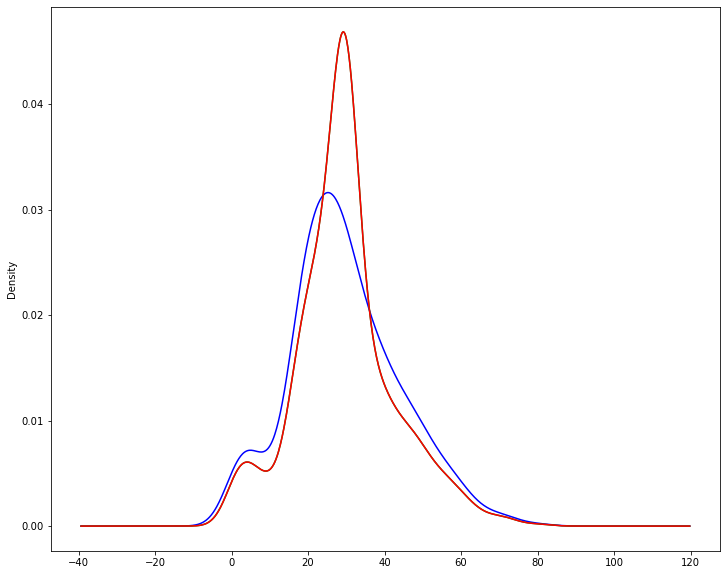

In [153]:
fig = plt.figure(figsize=(12,10))
ax=fig.add_subplot(111)

xtrain['Age'].plot(kind ='kde',ax= ax,color ='BLUE')
xtrain['Age_median'].plot(kind ='kde',ax= ax,color ='green')
xtrain['Age_mean'].plot(kind ='kde',ax= ax,color ='red')

## There is the change in the Distribution post applying the imputaion.

<AxesSubplot:>

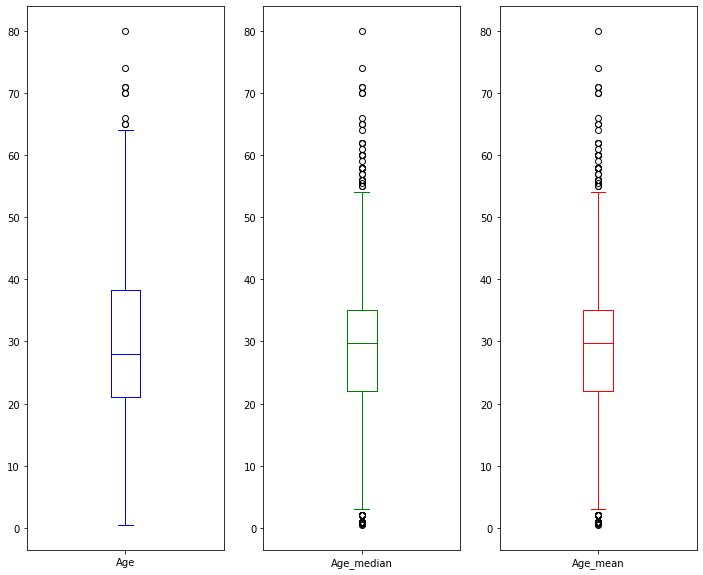

In [161]:
fig = plt.figure(figsize=(12,10))
ax1=fig.add_subplot(131)

xtrain['Age'].plot(kind ='box',ax= ax1,color ='BLUE')

ax2=fig.add_subplot(132)

xtrain['Age_median'].plot(kind ='box',ax= ax2,color ='green')

ax3=fig.add_subplot(133)

xtrain['Age_mean'].plot(kind ='box',ax= ax3,color ='red')

## USING SKLEARN

In [196]:
x= df_impute.drop('Survived',axis =1)
y = df_impute['Survived']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [197]:
from sklearn.impute import SimpleImputer
imputer_mean = SimpleImputer(strategy = 'mean')
imputer_median = SimpleImputer(strategy = 'median')

In [199]:
from sklearn.compose import ColumnTransformer
trf1 = ColumnTransformer([('imputer1',imputer_mean,['Age']),
                          ('imputer2',imputer_median,['Age']),
                           ('imputer3',imputer_median,['Fare'])]
                          ,remainder = 'passthrough')

In [200]:
trf1.fit(xtrain)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(), ['Age']),
                                ('imputer2', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer3', SimpleImputer(strategy='median'),
                                 ['Fare'])])

In [201]:
xtrain_trsfrmd = pd.DataFrame(data = trf1.transform(xtrain),columns = ['Age_Mean','Age_Median','Fare','Family'])
xtrain_trsfrmd

,Age_Mean,Age_Median,Fare,Family
0,32.0,32.0,56.4958,0.0
1,23.0,23.0,7.8958,0.0
2,42.0,42.0,52.5542,1.0
3,18.0,18.0,7.7750,0.0
4,42.0,42.0,13.0000,0.0
...,...,...,...,...
707,41.0,41.0,13.5000,2.0
708,51.0,51.0,26.5500,0.0
709,52.0,52.0,13.5000,0.0
710,28.0,28.0,26.0000,1.0


In [204]:
trf1.named_transformers_['imputer1'].statistics_,trf1.named_transformers_['imputer2'].statistics_,trf1.named_transformers_['imputer3'].statistics_

(array([30.02054577]), array([28.75]), array([13.5]))

In [205]:
xtest_trsfrmd = pd.DataFrame(trf1.transform(xtest),columns = ['Age_Mean','Age_Median','Fare','Family'])
xtest_trsfrmd

,Age_Mean,Age_Median,Fare,Family
0,2.000000,2.00,10.4625,1.0
1,12.000000,12.00,11.2417,1.0
2,66.000000,66.00,10.5000,0.0
3,32.000000,32.00,10.5000,0.0
4,28.000000,28.00,7.8958,0.0
...,...,...,...,...
174,24.000000,24.00,13.0000,0.0
175,22.000000,22.00,7.2500,0.0
176,30.020546,28.75,27.7208,0.0
177,14.000000,14.00,120.0000,3.0


In [211]:
xtrain['Fare'].median()

13.5

In [208]:
xtest_trsfrmd.isnull().sum()

Age_Mean      0
Age_Median    0
Fare          0
Family        0
dtype: int64